In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
import json
import re
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingRandomSearchCV
import seaborn as sns
import matplotlib.dates as mdates

sys.path.append(os.path.abspath("../src"))
import process

warnings.simplefilter('ignore')

In [6]:
akb_csv = r'..\data\akb.csv'
aku_csv = r'..\data\aku.csv'
atq_csv = r'..\data\atq.csv'
bnz_csv = r'..\data\bnz.csv'
eml_csv = r'..\data\eml.csv'
imh_csv = r'..\data\imh.csv'
iml_csv = r'..\data\iml.csv'
ncb_csv = r'..\data\ncb.csv'
ncu_csv = r'..\data\ncu.csv'
hcu_csv = r'..\data\hcu.csv'
hcb_csv = r'..\data\hcb.csv'
root_dir = r'..\output\MODEL_B'

site_dict = {'akb': akb_csv, 'aku': aku_csv, 'atq': atq_csv, 'bnz': bnz_csv, 'eml': eml_csv,
             'imh': imh_csv, 'iml': iml_csv, 'ncb': ncb_csv, 'ncu': ncu_csv, 'hcu': hcu_csv, 'hcb': hcb_csv}
model_a_features = ['st2', 'le', 'pres', 'h', 'rad', 'airt', 'ppt.roll', 'rh', 'vpd', 'ws']
model_b_features = ['sm1', 'filledsoilt','le', 'pres', 'h', 'rad', 'airt', 'ppt.roll', 'rh', 'vpd', 'ws']




Index(['FD01_flux', 'FD02_flux', 'FD03_flux', 'SoilTEMP_5cm', 'SoilTEMP_15cm',
       'SoilTEMP_25cm', 'ATM_Temp', 'SoilTemp_15cm_01', 'SoilTemp_15cm_02',
       'sm1', 'VWC15cm_raw_01', 'VWC15cm_raw_02', 'soilt1', 'st2', 'le',
       'pres', 'h', 'rad', 'airt', 'ppt', 'u', 'v', 'vwc1', 'vwc2', 'rh',
       'vpd', 'ws', 'ppt.roll', 'st1', 'month', 'filledsoilt'],
      dtype='object') 
rows= 70680
['FD01_flux', 'FD02_flux', 'FD03_flux']
..\output\MODEL_B\hcu_FD01_flux__240827
Processing folder: ..\output\MODEL_B\hcu_FD01_flux__240827
total data shape 70680
missing data index Index(['2015-12-31 15:00:00', '2015-12-31 16:00:00', '2015-12-31 17:00:00',
       '2015-12-31 18:00:00', '2015-12-31 19:00:00', '2015-12-31 20:00:00',
       '2015-12-31 21:00:00', '2015-12-31 22:00:00', '2015-12-31 23:00:00',
       '2016-01-01 00:00:00',
       ...
       '2024-01-28 04:00:00', '2024-01-28 05:00:00', '2024-01-28 06:00:00',
       '2024-01-28 07:00:00', '2024-01-28 08:00:00', '2024-01-28 09:00:00

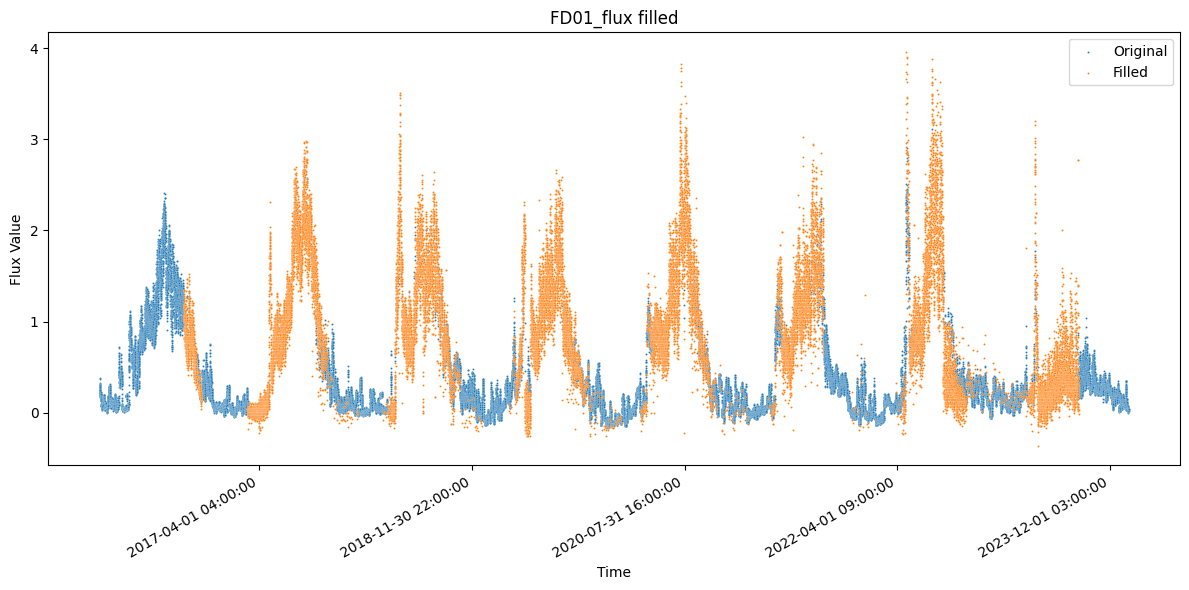

0.2427882010375028 
 0.23810301433974507 
 0.16883814107637427
FD01_flux_filled_slope1.111_rs0.873.csv
done
..\output\MODEL_B\hcu_FD02_flux__240827
Processing folder: ..\output\MODEL_B\hcu_FD02_flux__240827
total data shape 70680
missing data index Index(['2015-12-31 15:00:00', '2015-12-31 16:00:00', '2015-12-31 17:00:00',
       '2015-12-31 18:00:00', '2015-12-31 19:00:00', '2015-12-31 20:00:00',
       '2015-12-31 21:00:00', '2015-12-31 22:00:00', '2015-12-31 23:00:00',
       '2016-01-01 00:00:00',
       ...
       '2024-01-28 04:00:00', '2024-01-28 05:00:00', '2024-01-28 06:00:00',
       '2024-01-28 07:00:00', '2024-01-28 08:00:00', '2024-01-28 09:00:00',
       '2024-01-28 10:00:00', '2024-01-28 11:00:00', '2024-01-28 12:00:00',
       '2024-01-28 13:00:00'],
      dtype='object', name='timestamp', length=43973)
available data shape (26707, 12)
train/test shape (21366, 12) (5341, 12)
training y shape (21366, 1)
training x shape (21366, 11)
testing y shape (5341, 1)
testing x sha

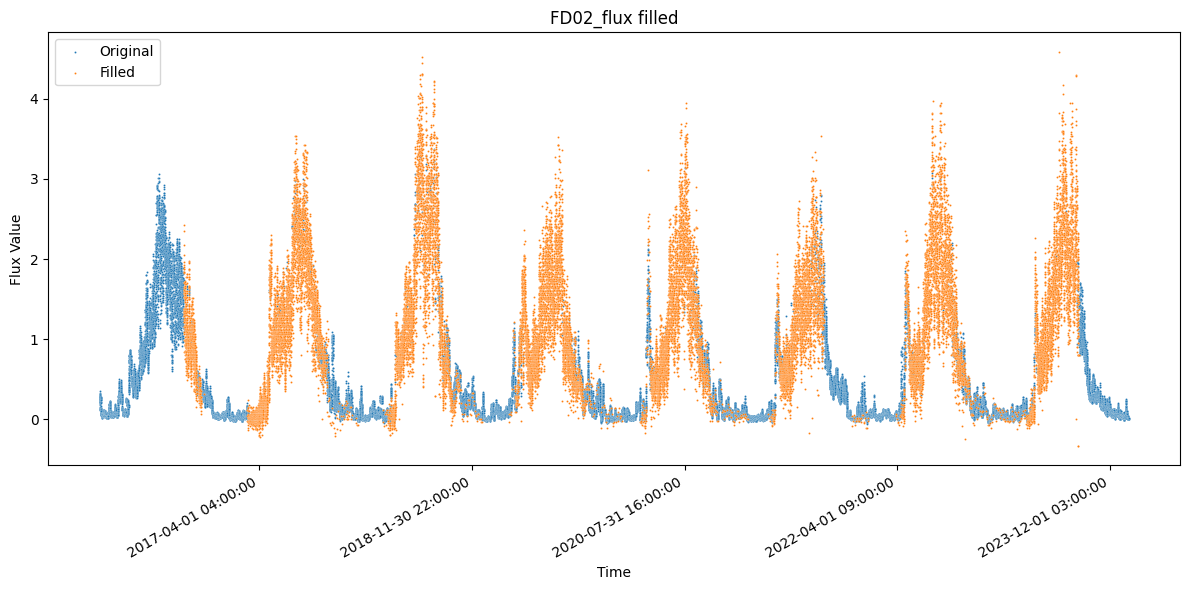

0.26833308205689427 
 0.2055648804213503 
 0.1956012694720791
FD02_flux_filled_slope1.079_rs0.886.csv
done
..\output\MODEL_B\hcu_FD03_flux__240827
Processing folder: ..\output\MODEL_B\hcu_FD03_flux__240827
total data shape 70680
missing data index Index(['2015-12-31 15:00:00', '2015-12-31 16:00:00', '2015-12-31 17:00:00',
       '2015-12-31 18:00:00', '2015-12-31 19:00:00', '2015-12-31 20:00:00',
       '2015-12-31 21:00:00', '2015-12-31 22:00:00', '2015-12-31 23:00:00',
       '2016-01-01 00:00:00',
       ...
       '2024-01-28 04:00:00', '2024-01-28 05:00:00', '2024-01-28 06:00:00',
       '2024-01-28 07:00:00', '2024-01-28 08:00:00', '2024-01-28 09:00:00',
       '2024-01-28 10:00:00', '2024-01-28 11:00:00', '2024-01-28 12:00:00',
       '2024-01-28 13:00:00'],
      dtype='object', name='timestamp', length=50821)
available data shape (19859, 12)
train/test shape (15887, 12) (3972, 12)
training y shape (15887, 1)
training x shape (15887, 11)
testing y shape (3972, 1)
testing x shap

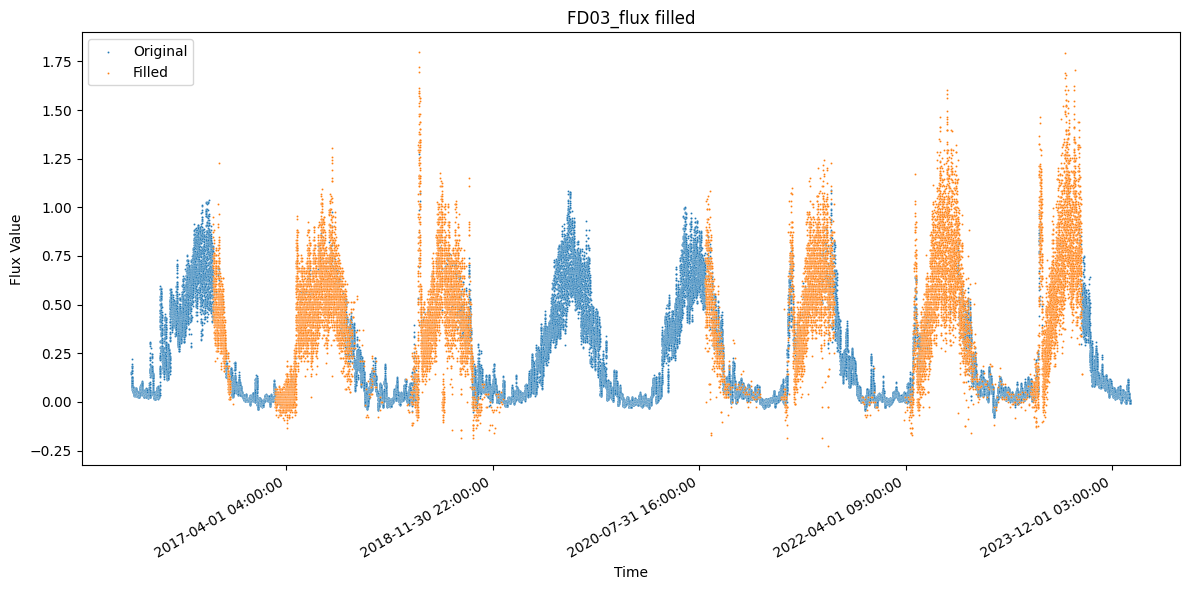

0.12757223736030407 
 0.2539866986152549 
 0.09380203101339232
FD03_flux_filled_slope1.092_rs0.804.csv
done
Index(['FD01_flux', 'FD02_flux', 'FD03_flux', 'SoilTEMP_5cm', 'SoilTEMP_15cm',
       'SoilTEMP_25cm', 'ATM_Temp', 'SoilTemp_15cm_01', 'SoilTemp_15cm_02',
       'VWC15cm_raw_01', 'VWC15cm_raw_02', 'sm1', 'st1', 'st2', 'le', 'pres',
       'h', 'rad', 'airt', 'ppt', 'u', 'v', 'vwc1', 'vwc2', 'rh', 'vpd', 'ws',
       'ppt.roll', 'month', 'filledsoilt'],
      dtype='object') 
rows= 70680
['FD01_flux', 'FD02_flux', 'FD03_flux']
..\output\MODEL_B\hcb_FD01_flux__240827
Processing folder: ..\output\MODEL_B\hcb_FD01_flux__240827
total data shape 70680
missing data index Index(['2015-12-31 15:00:00', '2015-12-31 16:00:00', '2015-12-31 17:00:00',
       '2015-12-31 18:00:00', '2015-12-31 19:00:00', '2015-12-31 20:00:00',
       '2015-12-31 21:00:00', '2015-12-31 22:00:00', '2015-12-31 23:00:00',
       '2016-01-01 00:00:00',
       ...
       '2024-01-28 04:00:00', '2024-01-28 05:00:00'

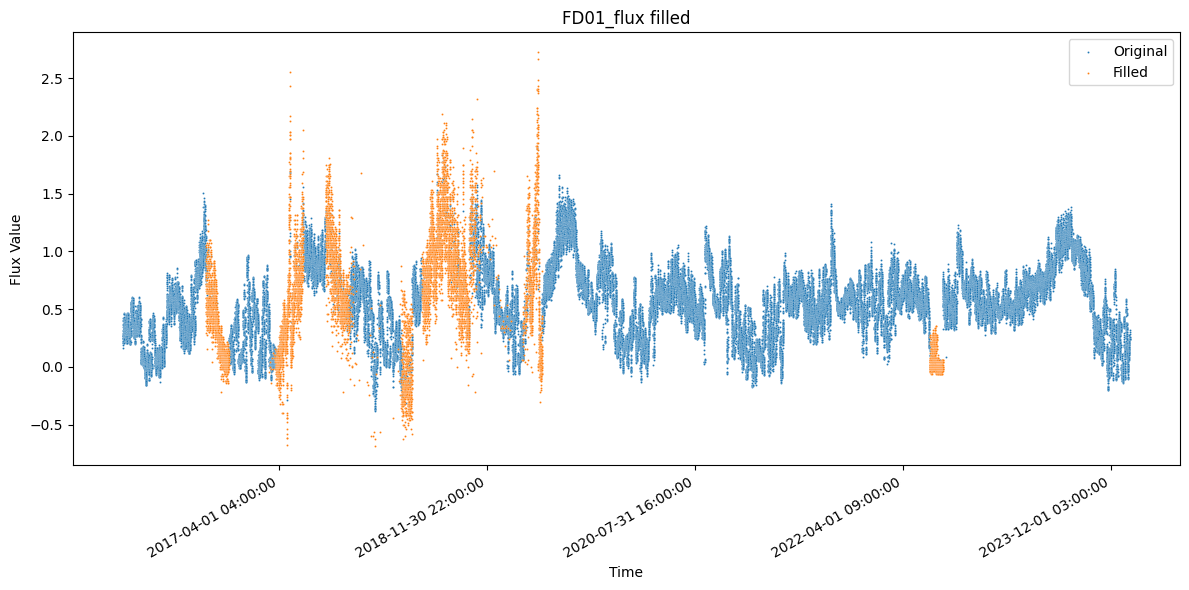

0.17661907141635552 
 0.29548173339949285 
 0.12583004446371707
FD01_flux_filled_slope1.077_rs0.873.csv
done
..\output\MODEL_B\hcb_FD02_flux__240827
Processing folder: ..\output\MODEL_B\hcb_FD02_flux__240827
total data shape 70680
missing data index Index(['2015-12-31 15:00:00', '2015-12-31 16:00:00', '2015-12-31 17:00:00',
       '2015-12-31 18:00:00', '2015-12-31 19:00:00', '2015-12-31 20:00:00',
       '2015-12-31 21:00:00', '2015-12-31 22:00:00', '2015-12-31 23:00:00',
       '2016-01-01 00:00:00',
       ...
       '2024-01-28 04:00:00', '2024-01-28 05:00:00', '2024-01-28 06:00:00',
       '2024-01-28 07:00:00', '2024-01-28 08:00:00', '2024-01-28 09:00:00',
       '2024-01-28 10:00:00', '2024-01-28 11:00:00', '2024-01-28 12:00:00',
       '2024-01-28 13:00:00'],
      dtype='object', name='timestamp', length=57872)
available data shape (12808, 12)
train/test shape (10246, 12) (2562, 12)
training y shape (10246, 1)
training x shape (10246, 11)
testing y shape (2562, 1)
testing x sh

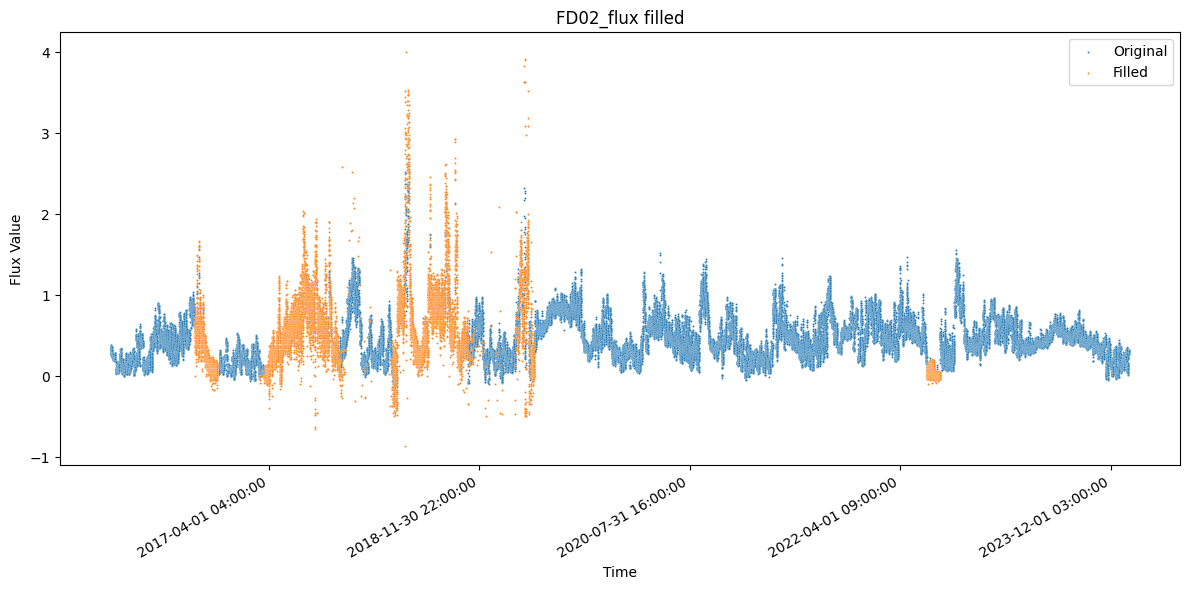

0.20633843047883985 
 0.3603577381341756 
 0.1346688159351104
FD02_flux_filled_slope1.139_rs0.832.csv
done
..\output\MODEL_B\hcb_FD03_flux__240827
Processing folder: ..\output\MODEL_B\hcb_FD03_flux__240827
total data shape 70680
missing data index Index(['2015-12-31 15:00:00', '2015-12-31 16:00:00', '2015-12-31 17:00:00',
       '2015-12-31 18:00:00', '2015-12-31 19:00:00', '2015-12-31 20:00:00',
       '2015-12-31 21:00:00', '2015-12-31 22:00:00', '2015-12-31 23:00:00',
       '2016-01-01 00:00:00',
       ...
       '2024-01-28 04:00:00', '2024-01-28 05:00:00', '2024-01-28 06:00:00',
       '2024-01-28 07:00:00', '2024-01-28 08:00:00', '2024-01-28 09:00:00',
       '2024-01-28 10:00:00', '2024-01-28 11:00:00', '2024-01-28 12:00:00',
       '2024-01-28 13:00:00'],
      dtype='object', name='timestamp', length=59599)
available data shape (11081, 12)
train/test shape (8865, 12) (2216, 12)
training y shape (8865, 1)
training x shape (8865, 11)
testing y shape (2216, 1)
testing x shape (

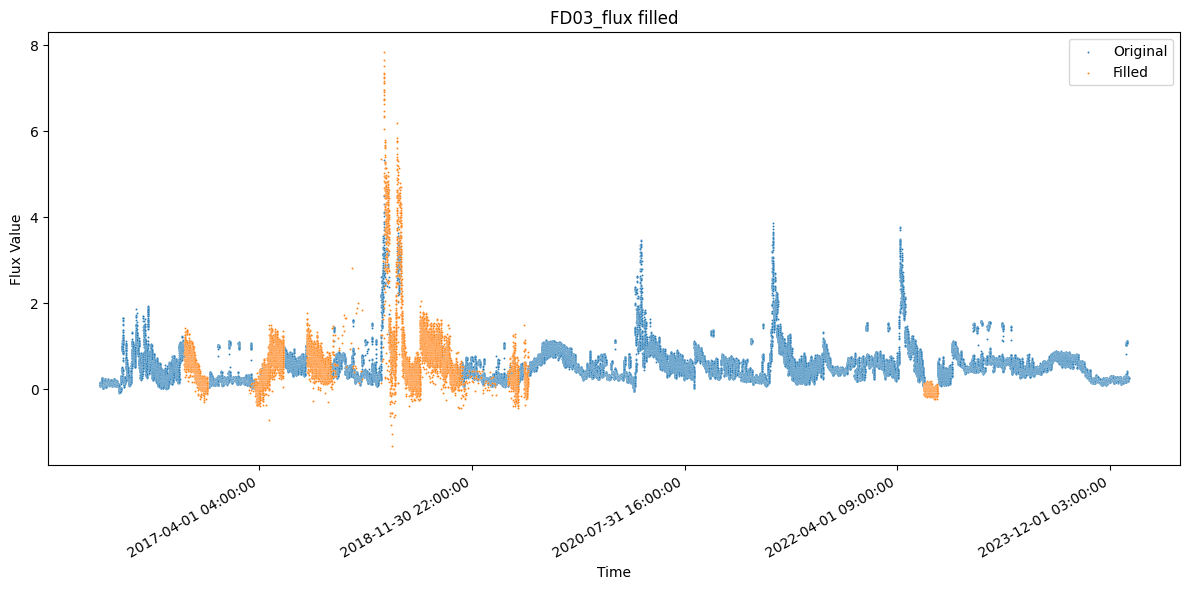

0.3283892204374708 
 0.48097387794337987 
 0.2023985709713579
FD03_flux_filled_slope1.191_rs0.861.csv
done


In [7]:
site_list = ['hcu', 'hcb']
feautres_to_use = model_b_features

# loop through all sites
for site_code in site_list:
    site_df =  process.read_csv(site_dict[site_code])
    # each site has three chambers, loop through each one
    r = re.compile("^FD.*_Flux$", re.IGNORECASE) #case insensitive
    srs_chambers_names = list(filter(r.match, list(site_df.columns)))
    print(srs_chambers_names)
    
    for chamber_name in srs_chambers_names:
        save_dir = process.create_savedir(root_dir, site_code, chamber_name)
        
        try:
        # if the folder exists and is not empty, skip to next iteration
            if os.path.exists(save_dir) and os.listdir(save_dir):
                print(f"Folder '{save_dir}' exists and is not empty. Skipping to next iteration...")
                continue
        
            # If the folder doesn't exist or is empty, this code will run
            print(f"Processing folder: {save_dir}")
            
            flux_chamber_df = site_df[[chamber_name]].copy(deep=True)
            features_df = site_df[feautres_to_use].copy(deep=True)

            # combine x,y 
            input_dataset = flux_chamber_df.merge(features_df, left_index=True, right_index=True)
            # split input dataset into tran test and inference
            x_train, y_train, x_test, y_test, x_inference = process.dataset_split(input_dataset, chamber_name)
            
            # search for the best params
            # The number of trees in the Random Forest depends on the number of rows in the data set
            param_grid = {
                'n_estimators': [600,700,800,900],  #  number of trees
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4, 8],
                'max_features': ['auto', 'sqrt', 'log2'],
                'warm_start': [True, False]
                        }
            rf = RandomForestRegressor()
            grid_search = HalvingRandomSearchCV(estimator=rf, param_distributions=param_grid, cv=5, n_jobs=-1).fit(x_train, y_train)
            best_params_= grid_search.best_params_
            print (best_params_)

            # rf regressor with best params
            rf = RandomForestRegressor(**best_params_, n_jobs=-1)
            rf.fit(x_train, y_train)

            # calculate r2 and round 3
            r2 = round(rf.score(x_test, y_test),3)
            print('R2:', r2)
            
            # slope check
            x_test_predict = rf.predict(x_test)
            slope = np.polyfit(x_test_predict, y_test[chamber_name], 1)[0].round(3)
            print ('slope =', slope)
                
            # inference
            model_inference = rf.predict(x_inference)
            data_filled_colname = chamber_name + '_filled'

            # put the filled data on its original index
            missingdata_index = input_dataset[input_dataset[chamber_name].isnull()].index
            model_inference_reshape = np.expand_dims(model_inference, axis=1)
            print (model_inference_reshape.shape)
            filled_series = pd.DataFrame(model_inference_reshape).rename(columns={0:data_filled_colname})
            filled_series.index = missingdata_index
            original_data = input_dataset.filter([chamber_name]).copy(deep=True) # original data
            original_data.loc[:] = np.nan # set all values to NaN only keep the shape
            original_data.loc[missingdata_index] = filled_series # set the missing index to the filled values
            filled_data_to_index = original_data.rename(columns={chamber_name:data_filled_colname})
            
            original_index_name = filled_data_to_index.index.name # get the original index name

            # plot
            fig, ax = plt.subplots(figsize=(12, 6))
            # Plot the 'Original' DataFrame
            sns.scatterplot(data=filled_data_to_index, x=original_index_name, y=data_filled_colname, 
                            label='Original', ax=ax, s=2)
            # Plot the 'Filled' DataFrame on the same axis
            sns.scatterplot(data=input_dataset, x=original_index_name, y=chamber_name, 
                            label='Filled', ax=ax, s=2)

            plt.title('{} filled'.format(chamber_name))
            plt.xlabel('Time')
            plt.ylabel('Flux Value')
            ax.xaxis.set_major_locator(mdates.AutoDateLocator())

            # Rotate and align the tick labels so they look better
            plt.gcf().autofmt_xdate()
            plt.legend()
            plt.tight_layout()
            plt.show()
            
            #Metrics
            rmse = root_mean_squared_error(y_test, x_test_predict)
            n_rmse = rmse/np.mean(y_test)
            mae = mean_absolute_error(y_test, x_test_predict)
            print (rmse, '\n', n_rmse, '\n', mae)
            
            # create output csv
            filled_gap = filled_data_to_index.reset_index()[data_filled_colname]
            original = input_dataset.reset_index()[chamber_name]
            output = pd.concat([original, filled_gap], axis=1)
            
            # save csv to file
            filename = data_filled_colname + '_slope' + str(slope) + '_rs' + str(r2) + '.csv'
            print (filename)
            output.to_csv(save_dir + '/' + filename)

            #save fig
            figname = data_filled_colname + 'slope' + str(slope) + '_rs' + str(r2) + '.jpeg'
            fig.savefig(save_dir + '/' + figname)

            # counting rows
            n_obs_spring, n_obs_summer, n_obs_autumn, n_obs_winter = process.count_by_seasons(flux_chamber_df.dropna())
            n_filled_spring, n_filled_summer, n_filled_autumn, n_filled_winter = process.count_by_seasons(x_inference)

            # output log
            output_log =  {'MODEL' : 'Random Forest',
                        'SITE' : site_code,
                        'SRS_CHAMBER' : chamber_name,
                        'FEATURES' : feautres_to_use,
                        'RSQUARE' : r2,
                        'SLOPE' : slope,
                        'RMSE' : rmse,
                        'N_RMSE' : n_rmse,
                        'MAE' : mae,
                        'start_t' : flux_chamber_df.index[0],
                        'end_t' : flux_chamber_df.index[-1],
                        'n_filled' : len(x_inference),
                        'n_observed' : len(flux_chamber_df) - len(x_inference),
                        'n_obs_spring' : n_obs_spring,
                        'n_obs_summer' : n_obs_summer,
                        'n_obs_autumn' : n_obs_autumn,
                        'n_obs_winter' : n_obs_winter,
                        'n_filled_spring' : n_filled_spring,
                        'n_filled_summer' : n_filled_summer,
                        'n_filled_autumn' : n_filled_autumn,
                        'n_filled_winter' : n_filled_winter
                    }
            output_log

            #save parameters
            with open(os.path.join(save_dir, 'output_log.json'), 'w') as fp:
                json.dump(output_log, fp)
            print ('done')
        except Exception as e:
            print(f"An error occurred while processing folder '{save_dir}': {str(e)}")
            print("Skipping to next iteration...")
            continue